In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rpy2.robjects as robjects
import rpy2.robjects.pandas2ri as pandas2ri
from rpy2.robjects.conversion import localconverter
from rpy2.robjects.packages import importr, isinstalled
import rpy2.robjects.packages as rpackages
from rpy2.robjects import r
import sys

import sys
sys.path.insert(0, '/Users/alanma/Documents/CFA_python')
import faircause.faircause as faircause
import faircause.fairprediction as fairprediction


In [2]:
# import
base = importr('base')
faircause = importr('faircause')

# Load census dataset
data = robjects.r('''
    get(data("compas", package = "faircause"))

''')

# Convert to pd
with localconverter(robjects.default_converter + pandas2ri.converter):
  data = robjects.conversion.rpy2py(data)
data.reset_index(drop=True, inplace=True)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

In [3]:
data.head()

,sex,age,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,c_charge_degree,two_year_recid
0,Male,69,Non-White,0,0,0,0,F,0
1,Male,34,Non-White,0,0,0,0,F,1
2,Male,24,Non-White,0,0,1,4,F,1
3,Male,23,Non-White,0,1,0,1,F,0
4,Male,43,Non-White,0,0,0,2,F,0


In [4]:
# one hot
data['sex'] = (data['sex'] != 'Male').astype(int)
data['race'] = (data['race'] != 'White').astype(int)
data['c_charge_degree'] = (data['c_charge_degree'] != 'M').astype(int)

In [5]:
X = "race"
W = ["juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count",
        "c_charge_degree"]
Z = ["age", "sex"]
Y = "two_year_recid"
x0 = 0
x1 = 1

In [6]:
import faircause.fairprediction as fairprediction
fair_pred = fairprediction.FairPredict(data, X, Z, W, Y, 
                                       x0=x0, x1=x1, BN=["IE"])


In [7]:
fair_pred.train()

/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in div

4.77 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts


5.71 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts


5.71 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts


5.71 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts


5.71 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts


5.71 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: invalid value encountered in divide
  y0[ts] = (Y.loc[ts].values - y_z0_ts) * (X.loc[ts] == 0).values / (1-px_z_ts) + y_z0_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts


5.71 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues


In [8]:
preds = fair_pred.predict(data)

/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts


4.31 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divi

4.74 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts


4.27 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:155: RuntimeWarning: divide by zero encountered in di

4.51 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts


4.56 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues


/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: divide by zero encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts
/Users/alanma/Documents/CFA_python/faircause/estimation/mediation_dml.py:156: RuntimeWarning: invalid value encountered in divide
  y1[ts] = (Y.loc[ts].values - y_z1_ts) * (X.loc[ts] == 1).values / (px_z_ts) + y_z1_ts


4.44 percent of extreme P(x|z) or p(x|z,w) prob
 Reported results are for the overlap pop. Consider investigating overlap issues


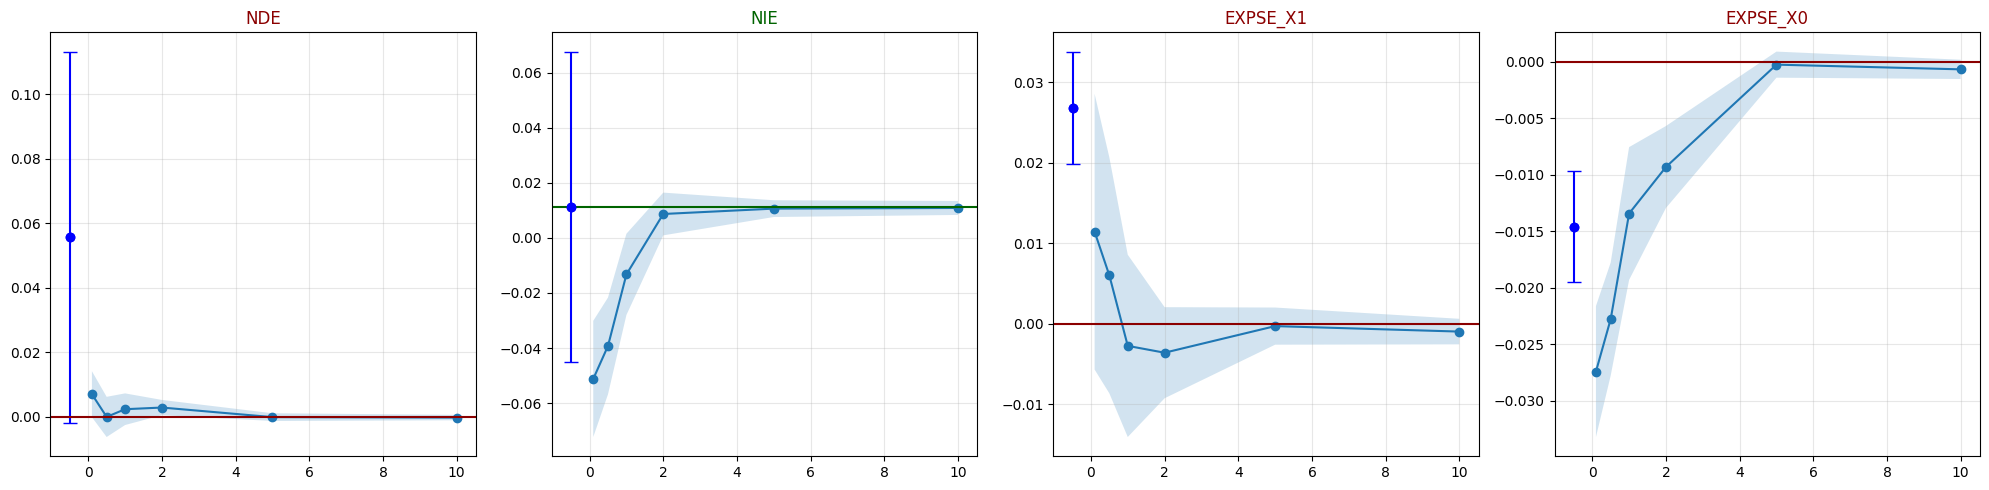

In [9]:
fair_pred.plot(type="causal")

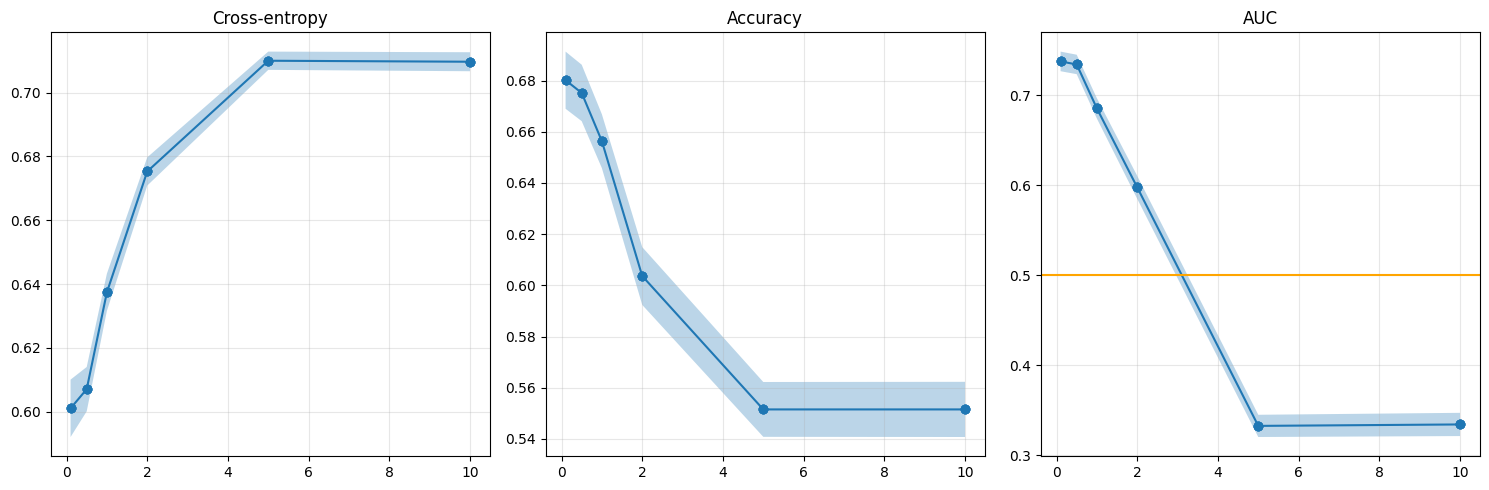

In [10]:
fair_pred.plot(type='accuracy')